## Example Small Sample Statistical Analysis Using Tumour $T_C$

We include the text files written to input to RIVET with parameters standardised using the global standardisation described in the paper, and exhibit our topological statistical analysis. The computation of landscapes is detailed in the notebook *Example Writing RIVET Input, Computing Multiparameter Persistence and Landscapes*.

In [5]:
import pandas as pd
import numpy as np
import multiparameter_landscape
import multiparameter_landscape_plotting
import matplotlib.pyplot as plt
import helper_functions
import os

Load in landscapes.

In [ ]:
landscape_path = r'C:/Users/Sina Roshandel/sciebo/Code/SpatialPatterningOfImmuneCells/ExampleSmallSamples/ExampleSmallSamples/Landscapes'

In [31]:
np.load('C:/Users/Sina Roshandel/sciebo/Code/SpatialPatterningOfImmuneCells/ExampleSmallSamples/ExampleSmallSamples/Landscapes\\TumourT_CCD6810NNCodensitySample10RipsMax1.txtH1x30y30.rivet.npy',
)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [22]:
import glob

In [48]:
files=glob.glob('C:/Users/Sina Roshandel/sciebo/Code/SpatialPatterningOfImmuneCells/ExampleSmallSamples/ExampleSmallSamples/Landscapes/*')

In [50]:
len(files)

212

In [52]:
# landscape_path='C:/Users/Sina Roshandel/sciebo/Code/SpatialPatterningOfImmuneCells/ExampleSmallSamples/ExampleSmallSamples/Landscapes'
# files = [fn for fn in os.listdir(landscape_path) if fn.endswith(".npy")]

cd8files = [fn for fn in files if "CD8" in fn]
foxp3files = [fn for fn in files if "FoxP3" in fn]
cd68files = [fn for fn in files if "CD68" in fn]


cd8n = len(cd8files)
foxp3n = len(foxp3files)
cd68n = len(cd68files)

# Create holder arrays to load in landscapes of each cell type
cd8 = np.zeros((cd8n, 51 ** 2))
foxp3 = np.zeros((foxp3n, 51 ** 2))
cd68 = np.zeros((cd68n, 51 ** 2))



In [56]:
# Load the first landscape into the holder arrays for each cell type
for holder, files in zip([cd8, foxp3, cd68], [cd8files, foxp3files, cd68files]):
    for t in range(len(files)):
        fn = files[t]
        holder[t, :] = np.load(os.path.join(landscape_path, fn))[0, :, :].flatten()

(65, 2601)
(74, 2601)
(73, 2601)


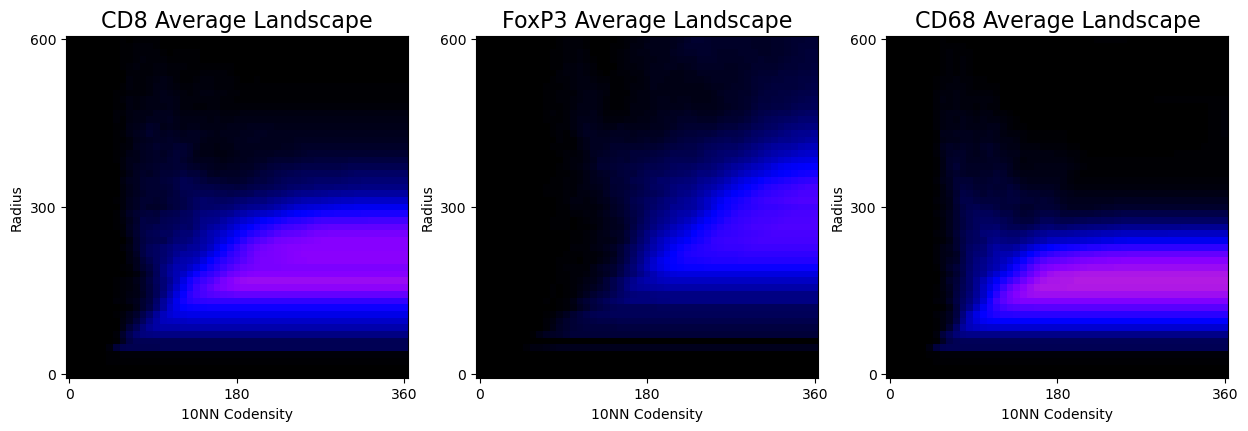

In [66]:
# Plot the average landscape for each cell type
f, axes = plt.subplots(1,3,figsize=(15,5))

for i, (celltype, landscape_holder) in enumerate(zip(['CD8', 'FoxP3','CD68'],[cd8, foxp3, cd68])):
    ax = plt.subplot(1,3,i+1)
    print(landscape_holder.shape)
    avg_landscape = np.mean(landscape_holder,axis = 0).reshape(51,51)
    ax.set_yticks([0,25, 50])
    ax.set_xticks([0,25, 50])
    ax.set_xticklabels([0, 180, 360])
    ax.set_yticklabels([600, 300, 0])
    ax.set_xlabel("10NN Codensity")
    ax.set_ylabel("Radius")
    ax.set_title(f"{celltype} Average Landscape", fontsize=16)
    ax.imshow(avg_landscape, cmap="gnuplot2", vmax=0.15, vmin=0)
    pass


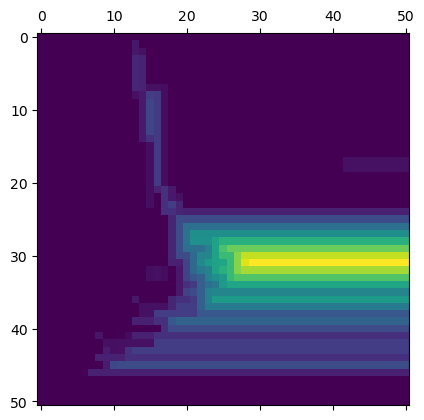

In [73]:
plt.matshow(cd8[-1].reshape(51,51))

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Sina Roshandel\AppData\Local\Temp\ipykernel_11668\304745614.py:21: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Radius $(\mu m)$", fontsize=15)


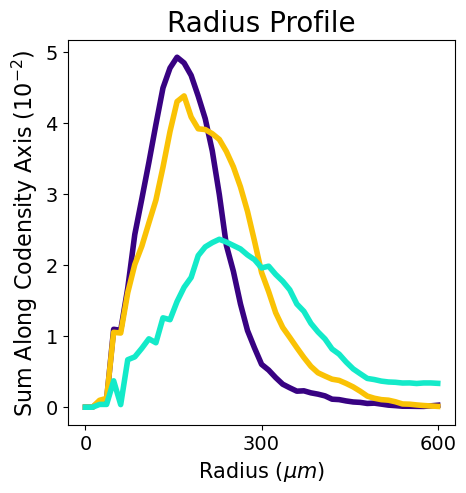

In [58]:
# Plot the radius profile
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

plt.title("Radius Profile", fontsize=20)
avg_CD68_lscape = np.mean(cd68, axis=0).reshape(51, 51)
avg_CD8_lscape = np.mean(cd8, axis=0).reshape(51, 51)
avg_FoxP3_lscape = np.mean(foxp3, axis=0).reshape(51, 51)

ax.plot(
    np.flip(np.sum(avg_CD68_lscape, axis=1) / 51.0 * 100), c="xkcd:indigo", linewidth=4
)
ax.plot(
    np.flip(np.sum(avg_CD8_lscape, axis=1) / 51.0 * 100),
    c="xkcd:goldenrod",
    linewidth=4,
)
ax.plot(
    np.flip(np.sum(avg_FoxP3_lscape, axis=1) / 51.0 * 100), c="xkcd:aqua", linewidth=4
)
ax.set_xlabel("Radius $(\mu m)$", fontsize=15)
ax.set_ylabel("Sum Along Codensity Axis $(10^{-2})$", fontsize=16)
ax.set_xticks([0, 25, 50])
ax.set_xticklabels([0, 300, 600])
# ax.set_yticks([])
plt.tick_params(labelsize=14)

Text(0.5, 1.0, 'Large Loop Functional')

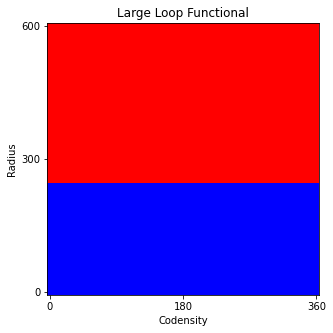

<IPython.core.display.Javascript object>

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

landscape = np.zeros((51, 51))
landscape[:, :] = 0
landscape[30:, :] = 0
landscape[:30, :] = 1
ax.imshow(landscape[:, :], cmap="bwr")
functional = landscape[:, :]
ax.set_ylabel("Radius")
ax.set_xlabel("Codensity")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_yticks([0, 25, 50])
ax.set_xticks([0, 25, 50])
ax.set_xticklabels([0, 180, 360])
ax.set_yticklabels([600, 300, 0])
ax.set_title("Large Loop Functional")

In [7]:
cd8_functional_values = []
foxp3_functional_values = []
cd68_functional_values = []


for files, func_values in zip([cd8files, foxp3files, cd68files],
                              [cd8_functional_values, foxp3_functional_values, cd68_functional_values]):
    
    for file in files:
        landscape_matrix = np.load(landscape_path + file)
        
        func_values.append(np.sum(np.multiply(landscape_matrix, functional))/(51.0*51.0)*1000)


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Large Loop Functional Distributions')

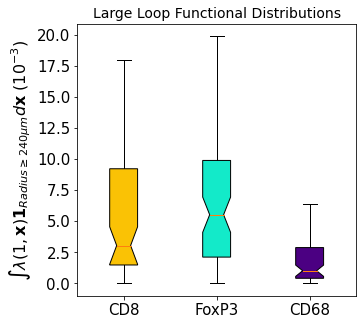

<IPython.core.display.Javascript object>

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
box_plot_data = [cd8_functional_values, foxp3_functional_values, cd68_functional_values]

bplot = ax.boxplot(
    box_plot_data,
    labels=["CD8", "FoxP3", "CD68"],
    patch_artist=True,
    notch=True,
    showfliers=False,
)
ax.tick_params(axis="both", labelsize=15)
colors = ["xkcd:goldenrod", "xkcd:aqua", "indigo"]
for patch, color in zip(bplot["boxes"], colors):
    patch.set_facecolor(color)
    ax.set_ylabel(
        "$\int \lambda(1, \mathbf{x}) \mathbf{1}_{Radius \geq 240 \mu m} d\mathbf{x}$ $(10^{-3})$",
        fontsize=16,
    )
ax.set_title("Large Loop Functional Distributions", fontsize=14)

Define function for 2-sided permutation test. Takes pooled observations, makes a random split into two groups and returns the absolute value of the difference between the means of the random split.

In [9]:
def permutation_test(pooled, sizeZ, sizeY):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return np.abs(starZ.mean() - starY.mean())

<IPython.core.display.Javascript object>

Count the proportion of occurences that the random split has a greater difference in mean than the observe functional values:

In [10]:
# Example Permutation Test

# number of random splits
numSamples = 20000
# the original difference in the means
delta = np.abs(np.mean(cd8_functional_values) - np.mean(foxp3_functional_values))
pooled = np.hstack((cd8_functional_values, cd68_functional_values))

estimates = np.array(
    [
        permutation_test(
            pooled, len(cd8_functional_values), len(foxp3_functional_values)
        )
        for _ in range(numSamples)
    ]
)
# Count the number of random splits where the differences in mean are greater than the original split
diffCount = sum(estimates >= delta)
# p_value given by the proportion of random samples in which a bigger difference in mean is observed
p_value = float(diffCount) / float(numSamples)
print(p_value)

0.03205


<IPython.core.display.Javascript object>

## Classify the cell types using the landscape vectors

In [11]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

ldr_classifier = LinearDiscriminantAnalysis()
qda_classifier = QuadraticDiscriminantAnalysis()
pca_classifier = PCA()
train_split = 0.8
nbr_of_repeats = 100

<IPython.core.display.Javascript object>

In [12]:
for X, y, label in zip(
    [
        np.vstack([cd68, foxp3]),
        np.vstack([cd8, foxp3]),
        np.vstack([cd8, cd68]),
        np.vstack([cd8, foxp3, cd68]),
    ],
    [
        np.array(["CD68"] * cd68n + ["FoxP3"] * foxp3n),
        np.array(["CD8"] * cd8n + ["FoxP3"] * foxp3n),
        np.array(["CD8"] * cd8n + ["CD68"] * cd68n),
        np.array(["CD8"] * cd8n + ["FoxP3"] * foxp3n + ["CD68"] * cd68n),
    ],
    ["CD68vsFoxP3", "CD8vsFoxP3", "CD8vsCD68", "3way"],
):

    print(label)

    pca = PCA(n_components=3)
    Xr = pca.fit(X).transform(X)
    test_accuracy_lda = []
    test_accuracy_lda_pca = []
    test_accuracy_qda_pca = []
    mask = np.array([False] * len(y))
    mask[: int(np.floor(len(y) * train_split))] = True
    for _ in range(nbr_of_repeats):
        np.random.shuffle(mask)

        X_train = X[mask]
        Xr_train = Xr[mask]
        y_train = y[mask]

        X_test = X[np.logical_not(mask)]
        Xr_test = Xr[np.logical_not(mask)]
        y_test = y[np.logical_not(mask)]

        ldr_classifier = LinearDiscriminantAnalysis()
        ldr_classifier.fit(X_train, y_train)
        test_accuracy_lda.append(ldr_classifier.score(X_test, y_test))

        ldr_pcaclassifier = LinearDiscriminantAnalysis()
        ldr_pcaclassifier.fit(Xr_train, y_train)
        test_accuracy_lda_pca.append(ldr_pcaclassifier.score(Xr_test, y_test))

        qda_classifier = QuadraticDiscriminantAnalysis()
        qda_classifier.fit(Xr_train, y_train)
        test_accuracy_qda_pca.append(qda_classifier.score(Xr_test, y_test))

    print("lda accuracy:", np.mean(test_accuracy_lda))
    print("lda with pca accuracy:", np.mean(test_accuracy_lda_pca))
    print("qda with pca accuracy:", np.mean(test_accuracy_qda_pca))

CD68vsFoxP3
lda accuracy: 0.7260000000000001
lda with pca accuracy: 0.8730000000000002
qda with pca accuracy: 0.838
CD8vsFoxP3
lda accuracy: 0.6864285714285714
lda with pca accuracy: 0.7542857142857141
qda with pca accuracy: 0.6396428571428571
CD8vsCD68
lda accuracy: 0.5960714285714286
lda with pca accuracy: 0.6392857142857142
qda with pca accuracy: 0.6514285714285716
3way
lda accuracy: 0.5127906976744186
lda with pca accuracy: 0.6306976744186047
qda with pca accuracy: 0.6386046511627907


<IPython.core.display.Javascript object>